# PCA ON OSMIA OCCURRENCE POINTS ONLY, AMERICA TRANFORMED TO OSMIA PCA SPACE, MAHAL DIST BETWEEN

In [100]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [101]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
#print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

In [102]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
america['elev'] = np.log(america['elev'] + 1) # log transform
america_points = america[['lat', 'lon']].reset_index(drop=True)
america = america.drop(columns=['lat', 'lon', 'elev',  'ndvi'])
# america = america.drop(columns=['lat', 'lon', 'elev', 'ndvi', 'bio_12', 'bio_13', 'bio_14', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19'])
# america = america.drop(columns=['lat', 'lon', 'ndvi', 'elev','bio_2','bio_3',  'bio_4', 'bio_5', 'bio_6', 'bio_7', 'bio_8', 'bio_9', 'bio_11', 'bio_12', 'bio_13', 'bio_14', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19'])
# america = america.drop(columns=['lat', 'lon', 'ndvi', 'elev', 'bio_8', 'bio_9', 'bio_12', 'bio_13', 'bio_14', 'bio_15', 'bio_16', 'bio_17', 'bio_18', 'bio_19'])
#america['group'] = 'america'


In [103]:
bio_columns = [col for col in america.columns if col.startswith('bio_')]
other_columns = [col for col in america.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
america = america[sorted_columns]

In [104]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia.drop(columns=['Unnamed: 0'])

osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
# coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia['elev'] = np.log(osmia['elev'] + 1)
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia.drop(columns=['lat', 'lon'])
#osmia['group'] = 'osmia'
osmia = osmia[sorted_columns]

In [105]:
osmia.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,10.009688,8.278501,33.389905,624.651607,23.891918,-0.948856,24.840774,12.832826,6.091684,17.816422,2.525564,774.406914,84.391770,46.286584,18.623511,235.904033,154.334486,212.502058,179.278848
std,1.356123,0.899696,2.355533,75.678414,1.938135,1.876418,2.535589,5.250783,4.892664,1.560124,1.817177,157.878150,19.633771,12.097195,8.645285,54.258283,37.393388,57.132840,46.886702
min,-0.629167,5.083334,22.902868,363.726500,9.900000,-11.000000,15.400001,-1.366667,-6.300000,5.883333,-6.516667,328.000000,41.000000,1.000000,7.727378,116.000000,6.000000,6.000000,64.000000
25%,9.325000,7.691667,32.142857,566.954170,22.800000,-2.000000,22.900000,7.350000,3.716667,16.900000,1.400000,668.000000,73.000000,40.000000,13.031209,204.000000,133.000000,188.000000,151.000000
50%,9.900000,8.141666,33.234127,615.575600,23.400000,-0.800000,24.500000,15.583333,5.550000,17.450000,2.566667,772.000000,79.000000,46.000000,15.465448,223.000000,156.000000,204.000000,183.000000
75%,10.416667,8.666667,34.599107,665.625000,24.700000,0.250000,26.199999,17.033333,6.283333,18.391666,3.500000,836.000000,91.000000,53.000000,21.676554,251.000000,173.000000,226.000000,199.000000
max,18.087500,13.800000,46.227200,1162.149500,34.200000,8.000000,40.200000,21.700000,25.233334,25.233334,11.600000,1921.000000,234.000000,129.000000,88.891600,570.000000,428.000000,552.000000,557.000000


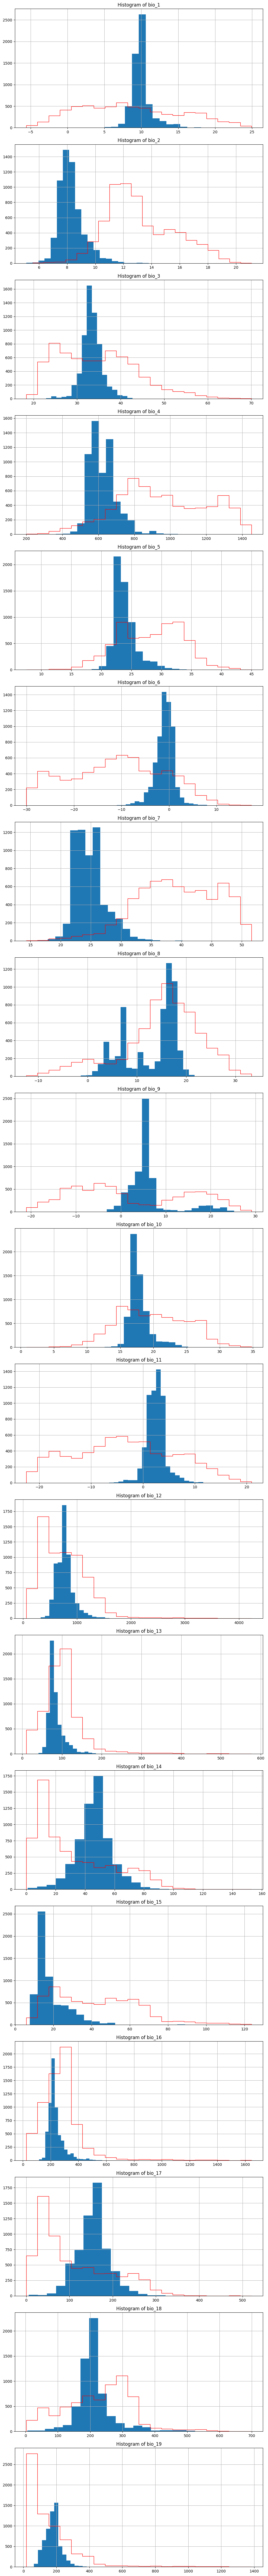

In [106]:
plt.figure(figsize=(10, 5 * len(osmia.columns)))

for i, column in enumerate(osmia.columns):
    plt.subplot(len(osmia.columns), 1, i + 1)
    osmia[column].hist(bins=20)
    america[column].hist(bins=20, edgecolor='red', histtype='step')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
# plt.savefig('figures/histograms/all_data_distributions.png', format='png', dpi=300)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(osmia)

osmia_scaled = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
america_scaled = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [149]:
osmia_scaled.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,PC1,PC2,PC3,PC4
count,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,...,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6075.000000,6.075000e+03,6075.000000,6.075000e+03
mean,8.421247e-16,1.066691e-15,6.035227e-16,-1.590680e-16,5.520595e-16,-6.082012e-17,-6.362720e-16,8.421247e-17,1.193010e-16,-1.450326e-16,...,-1.309972e-16,-5.614165e-17,-2.011742e-16,-6.549859e-17,1.380149e-16,-1.637465e-16,0.000000,9.356941e-18,0.000000,3.508853e-18
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,...,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,2.520809,2.298469e+00,1.943996,1.055790e+00
min,-7.845699e+00,-3.551678e+00,-4.452453e+00,-3.448098e+00,-7.219863e+00,-5.357000e+00,-3.723612e+00,-2.704484e+00,-2.532916e+00,-7.649436e+00,...,-3.743869e+00,-1.260459e+00,-2.210057e+00,-3.967191e+00,-3.614717e+00,-2.458871e+00,-11.225576,-7.731613e+00,-4.644956,-5.899665e+00
25%,-5.049280e-01,-6.523120e-01,-5.294557e-01,-7.624656e-01,-5.634322e-01,-5.602326e-01,-7.654764e-01,-1.044278e+00,-4.854642e-01,-5.874518e-01,...,-5.197157e-01,-6.469148e-01,-5.880514e-01,-5.705886e-01,-4.288965e-01,-6.031812e-01,-1.449601,-1.478231e+00,-1.173145,-5.350204e-01
50%,-8.089015e-02,-1.521025e-01,-6.613810e-02,-1.199385e-01,-2.538307e-01,7.933638e-02,-1.344073e-01,5.238711e-01,-1.107227e-01,-2.348868e-01,...,-2.369210e-02,-3.653232e-01,-2.378456e-01,4.454401e-02,-1.488243e-01,7.937130e-02,0.438936,-1.273209e-01,-0.595290,-4.209131e-03
75%,3.001296e-01,4.314772e-01,5.133876e-01,5.414591e-01,4.169724e-01,6.389592e-01,5.361031e-01,8.000431e-01,3.917387e-02,3.687471e-01,...,5.550021e-01,3.531744e-01,2.782471e-01,4.992073e-01,2.362749e-01,4.206475e-01,1.459544,1.074650e+00,0.717202,5.691706e-01
max,5.957040e+00,6.137579e+00,5.450296e+00,7.102978e+00,5.318995e+00,4.769509e+00,6.057958e+00,1.688873e+00,3.912639e+00,4.754442e+00,...,6.837967e+00,8.128578e+00,6.158018e+00,7.319156e+00,5.942745e+00,8.056703e+00,20.087017,1.052548e+01,10.272498,8.165675e+00


In [108]:

cov_df = osmia_scaled.copy()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12'),
  Text(0, 12.5, '13'),
  Text(0, 13.5, '14'),
  Text(0, 14.5, '15'),
  Text(0, 15.5, '16'),
  Text(0, 16.5, '17'),
  Text(0, 17.5, '18'),
  Text(0, 18.5, '19')])

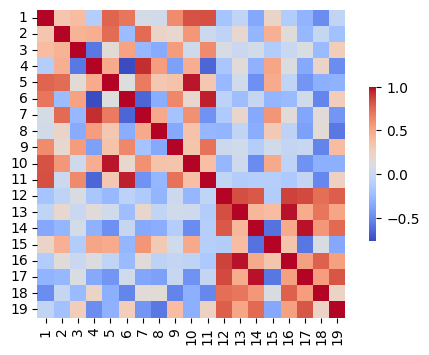

In [109]:
import seaborn as sns

cov_df = cov_df.rename(columns=lambda x: x.replace('bio_', '') if x.startswith('bio_') else x)

cov_reduced = cov_df.cov()

plt.figure(figsize=(6,4))  
sns.heatmap(cov_reduced, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.yticks(rotation=0, ha='right')

# plt.savefig('figures/heatmaps/full_cov_heatmap.png', format = 'png', bbox_inches='tight', pad_inches=0, dpi = 300)

In [110]:
from scipy.linalg import eigh

correlation_matrix = osmia_scaled.corr()

eigenvalues, eigenvectors = eigh(correlation_matrix)

eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

num_pcs = len(eigenvalues[eigenvalues>1])

print('EIGENVALUES\n')
for i, value in enumerate(eigenvalues, start=1):
    print(f"PC{i}: {round(value,2)}")

    

EIGENVALUES

PC1: 6.35
PC2: 5.28
PC3: 3.78
PC4: 1.11
PC5: 1.05
PC6: 0.77
PC7: 0.38
PC8: 0.12
PC9: 0.05
PC10: 0.04
PC11: 0.02
PC12: 0.02
PC13: 0.01
PC14: 0.01
PC15: 0.01
PC16: 0.0
PC17: 0.0
PC18: 0.0
PC19: 0.0


Explained Variance Ratio: [0.33439107 0.27800475 0.19886841 0.05865836]
Total explained variance: 0.8699225895185231


Text(0.5, 1.0, 'PCA Loadings Heatmap')

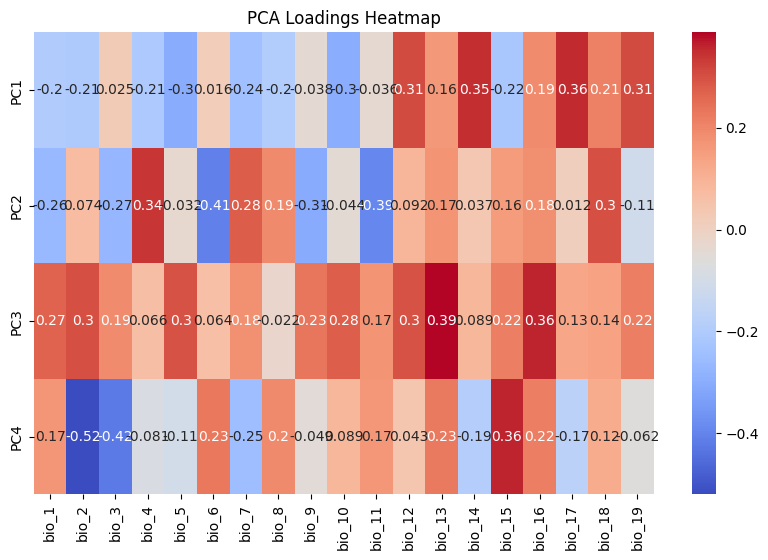

In [111]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=4) 
pca_result = pca.fit_transform(osmia_scaled) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=osmia_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
# plt.savefig('figures/pca_plots/loadings_heatmap.png', format='png', dpi=300)

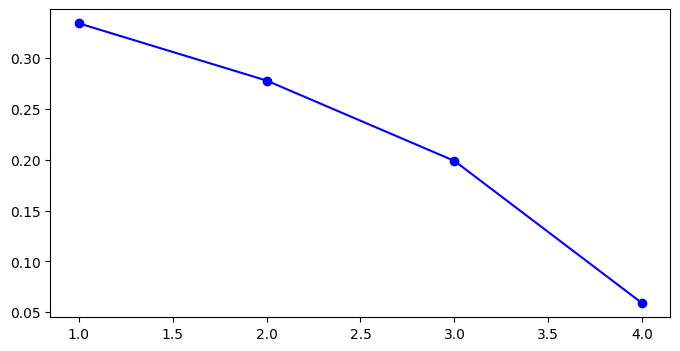

In [112]:
explained_variance = pca.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')


In [113]:
n_components = pca_result.shape[1]

for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = pca_result[:, i]


In [114]:
america_pca = pca.transform(america_scaled)
for i in range(n_components):
    america_scaled[f'PC{i+1}'] = america_pca[:, i]

In [115]:
# combined_filtered['group'] = combined_clipped['group']
america_scaled['group'] = 'america'
osmia_scaled['group'] = 'osmia'

In [116]:
# colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

# plt.figure(figsize=(5, 4))

# # unique_labels = combined['group'].unique()  
# # for i, label in enumerate(unique_labels):
# #     subset = combined_filtered[combined_filtered['group'] == label]  
# #     plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)

# plt.scatter(america_scaled['PC1'], america_scaled['PC2'], c='#E1BAAA', label='america', s=3, marker= 'o', alpha=0.3)
# plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c='#523759', label='osmia', s=3, marker= 'o', alpha=0.3)
# # plt.legend()
# # plt.xlabel('Principal Component 1')
# # plt.ylabel('Principal Component 2')
# plt.tight_layout()

# plt.savefig('figures/pca_plots/pca_osmia_mahal.svg', format='svg')

In [117]:
america_scaled[america_scaled['PC1']>30]
america_points.iloc[6081]

lat     52.828283
lon   -128.646465
Name: 6081, dtype: float64

In [118]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [119]:
# america_points.iloc[mahal_distances.idxmax()]

In [120]:
# america.iloc[mahal_distances.idxmax()]

In [121]:
# osmia.describe()

In [122]:
# mahal_distances_eur.idxmin()

In [123]:
# osmia_coords.iloc[3729]

In [124]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [125]:
osmia_pca_df = osmia_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_scaled.iloc[:, -(n_components+1):-1].reset_index(drop=True)
# europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
# europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [126]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_mean = osmia_pca_df.mean()
osmia_cov = osmia_pca_df.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

(array([1.311e+03, 1.407e+03, 1.016e+03, 7.500e+02, 5.660e+02, 4.640e+02,
        3.180e+02, 2.510e+02, 1.840e+02, 1.050e+02, 7.500e+01, 3.500e+01,
        1.300e+01, 1.400e+01, 8.000e+00, 5.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00]),
 array([7.08695495e-05, 2.83833997e-02, 5.66959299e-02, 8.50084600e-02,
        1.13320990e-01, 1.41633520e-01, 1.69946050e-01, 1.98258581e-01,
        2.26571111e-01, 2.54883641e-01, 2.83196171e-01, 3.11508701e-01,
        3.39821231e-01, 3.68133762e-01, 3.96446292e-01, 4.24758822e-01,
        4.53071352e-01, 4.81383882e-01, 5.09696412e-01, 5.38008943e-01,
        5.66321473e-01]),
 <BarContainer object of 20 artists>)

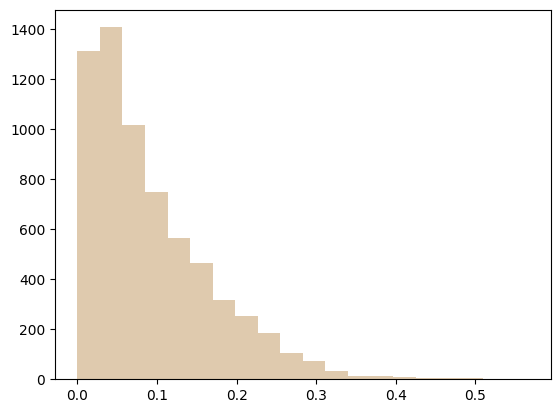

In [127]:
from scipy.stats import chi2

degrees_freedom = osmia_pca_df.shape[1]
chi_sq = 1 - chi2.cdf(mahal_distances, degrees_freedom)
plt.hist(chi_sq, bins=20, alpha=0.7, color='tan')

In [128]:
mahal_distances

0       10.594475
1       10.674991
2       12.438797
3       13.576389
4        9.686185
          ...    
6530    13.315436
6531    12.819546
6532    13.255563
6533    12.501562
6534    12.583016
Length: 6535, dtype: float64

In [129]:
mahal_distances_eur = osmia_pca_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

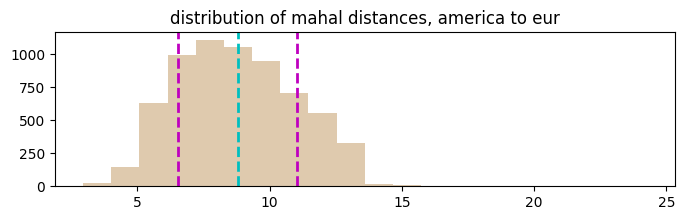

In [130]:
mean = np.mean(mahal_distances)
std_dev = np.std(mahal_distances)

plt.figure(figsize=(8, 2))

# Create histogram
plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

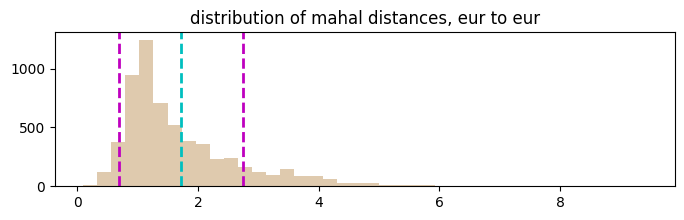

In [131]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.figure(figsize=(8, 2))

plt.hist(mahal_distances_eur, bins=40, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [132]:
max(mahal_distances_eur)

9.43435793150334

In [133]:
# import matplotlib.colors as mcolors
# import matplotlib.cm as cm

# fig, axs = plt.subplots(2, 1, figsize=(8, 2), sharex=True)
# plt.gca().set_facecolor('#e1e1e1')

# bins = np.linspace(0,16,50)

# n, bins, patches = axs[1].hist(mahal_distances, bins=bins)
# cmap = cm.Spectral
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)
# axs[1].set_facecolor('#e1e1e1')
# axs[0].set_facecolor('#e1e1e1')


# axs[0].hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

# x_min = min(mahal_distances_eur)
# x_max = max(mahal_distances)
# axs[0].set_xlim(x_min, 16)
# axs[1].set_xlim(x_min, 16)

# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# plt.subplots_adjust(hspace=0)
# plt.savefig('figures/histograms/colormap_hist.svg', format='svg')

# plt.figure(figsize=(10,3))
# n, bins, patches = plt.hist(distance_points['normalized'], bins=80)

# cmap = cm.coolwarm_r
# norm = mcolors.Normalize(vmin=0, vmax=0.4)
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)
# plt.gca().set_facecolor('#e1e1e1')
# plt.ylabel('Counts')
# plt.xlabel('Normalized minimum distance to native range point')
# plt.tight_layout()


In [134]:
print('Euro range of distances:', mahal_distances_eur.min(), mahal_distances_eur.max())

Euro range of distances: 0.09528016486814594 9.43435793150334


In [135]:
print('Range of mahal distances:', mahal_distances.min(), mahal_distances.max())

Range of mahal distances: 2.949442172828543 24.25906777959185


In [136]:
len(mahal_distances[mahal_distances<mahal_distances_eur.max()])/len(mahal_distances)

0.618362662586075

In [137]:
america_points['dist'] = mahal_distances
america_points['chi'] = chi_sq

In [138]:
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

In [139]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

# colors = ['#DBDBDB', "#ee4949", "#de8c9e", "#dd8cde", "#8c94de", '#DBDBDB']
# cmap_custom = LinearSegmentedColormap.from_list("cmap_custom", colors)
# mpl.colormaps.register(cmap=cmap_custom, force=True)

# colors = ['#DBDBDB', "#ee4949", "#ee8b49", "#cacc5c", "#65c392", "#6597c3", '#DBDBDB']
# cmap_custom2 = LinearSegmentedColormap.from_list("cmap_custom2", colors)
# mpl.colormaps.register(cmap=cmap_custom2, force=True)

colors = ['#DBDBDB', "#c51616", "#d77009", "#ceb812", "#0fa919", "#7c90de", '#DBDBDB']
cmap_custom3 = LinearSegmentedColormap.from_list("cmap_custom3", colors)
mpl.colormaps.register(cmap=cmap_custom3, force=True)

/tmp/ipykernel_13237/1062882266.py:14: UserWarning: Overwriting the cmap 'cmap_custom3' that was already in the registry.
  mpl.colormaps.register(cmap=cmap_custom3, force=True)


In [140]:
def add_scale_bar(ax, length=100, location=(0, 0), linewidth=5, units='km', text=True):
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
    import numpy as np

    extent = ax.get_extent(crs=ccrs.PlateCarree())
    map_width_deg = extent[1] - extent[0]

    mid_lat = (extent[2] + extent[3]) / 2

    km_per_deg_at_lat = np.cos(np.radians(mid_lat)) * 111.32

    map_width_km = map_width_deg * km_per_deg_at_lat

    scale_bar_length_deg = (length / map_width_km) * map_width_deg
    
    x_start = location[0] * map_width_deg + extent[0]
    x_end = x_start + scale_bar_length_deg
    y_position = location[1] * (extent[3] - extent[2]) + extent[2]

    ax.plot([x_start, x_end], [y_position, y_position], transform=ccrs.PlateCarree(), color='k', linewidth=linewidth)
    
    if text==True:
        ax.text(x_end, y_position, ' '+f'{length} {units}', verticalalignment='bottom', horizontalalignment='left', transform=ccrs.Geodetic(), fontsize=10)

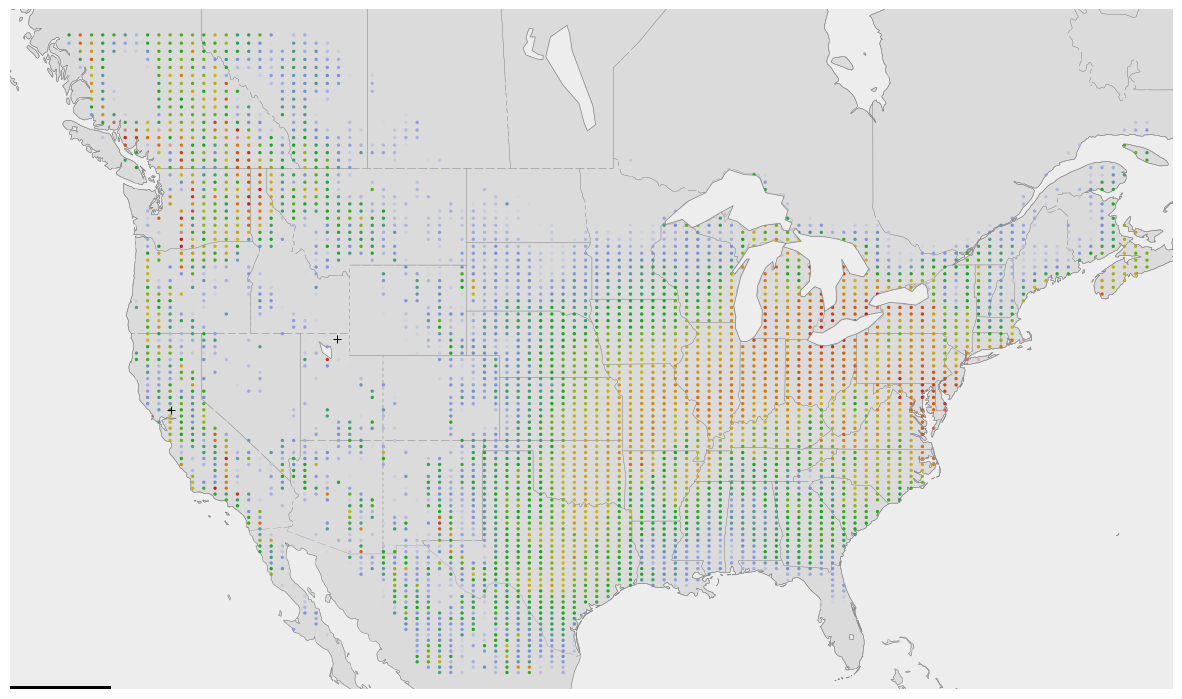

In [141]:
import geopandas as gpd
# from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
# from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

cities = {'logan': [41.73530959506221, -111.837716001538],
          'dixon': [38.44453457025947, -121.82173075314377]}

map_projection = ccrs.Mercator() 
shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)
great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.STATES, linewidth=.2, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='cmap_custom3', vmin=mahal_distances.min(), vmax =mahal_distances_eur.max(), s=2)

for city in cities.values():
    ax.scatter(city[1], city[0], transform=ccrs.PlateCarree(), s=40, c='k', marker="+", lw=0.7)

ax.axis('off')

add_scale_bar(ax, 500, location=(0, 0), linewidth=5, units='km', text=False)

# plt.savefig('figures/maps/similarity_map.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

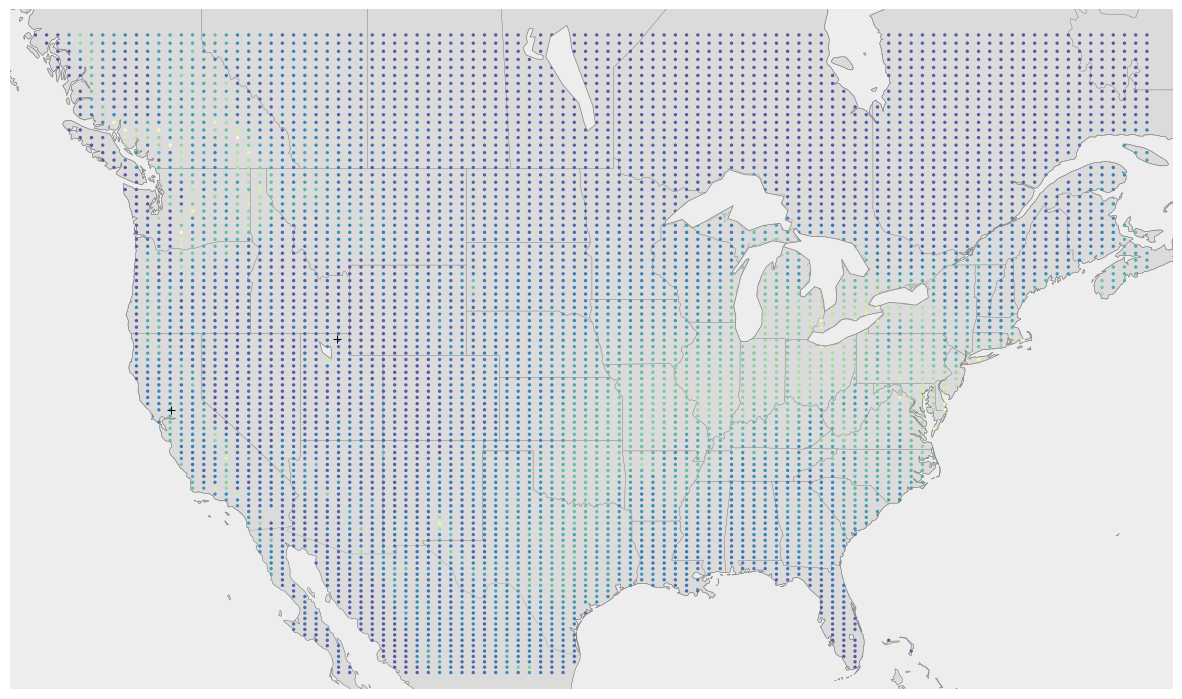

In [142]:

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(cfeature.STATES, linewidth=.2, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['chi'], cmap='Spectral_r', vmin=0, vmax=1, s=2)

for city in cities.values():
    ax.scatter(city[1], city[0], transform=ccrs.PlateCarree(), s=40, c='k', marker="+", lw=0.7)

ax.axis('off')

In [143]:
print(min(mahal_distances), max(mahal_distances_eur))

bins_start = np.linspace(0, min(mahal_distances), 10, endpoint=False)
bins_middle = np.linspace(min(mahal_distances), max(mahal_distances_eur)+0.25, 30)  
bins_end = np.linspace(max(mahal_distances_eur)+0.25, 16, 30, endpoint=True)

bins = np.concatenate((bins_start, bins_middle, bins_end)) 

2.949442172828543 9.43435793150334


In [144]:
# import matplotlib.colors as mcolors
# import matplotlib.gridspec as gridspec



# fig = plt.figure(figsize=(10, 1))  

# gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])

# ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1], sharex=ax1)

# fig.subplots_adjust(hspace=0) 

# # bins = np.linspace(0,16,50)

# n, bins, patches = ax1.hist(mahal_distances, bins=bins)
# cmap = cmap_custom3
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)

# n, bins, patches = ax2.hist(mahal_distances, bins=bins)
# cmap = cmap_custom3
# norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
# for bin, patch in zip(bins, patches):
#     color = cmap(norm(bin))
#     patch.set_facecolor(color)

# x_min = min(mahal_distances_eur)
# x_max = max(mahal_distances)
# ax1.set_xlim(0, 16)
# ax2.set_xlim(0, 16)


# ax1.set_ylim(10, 450) 
# ax2.set_ylim(0, 10)
# 2.11
# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# for ax in axs:
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax1.spines.top.set_visible(False)
# ax2.spines.right.set_visible(False)
# ax1.spines.right.set_visible(False)
# ax1.tick_params(labeltop=False)
# ax2.xaxis.tick_bottom()

# for ax in (ax1, ax2):
#     ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
#     ax.axvline(max(mahal_distances_eur), color='gray', linestyle='--', ymin=0, ymax=2)



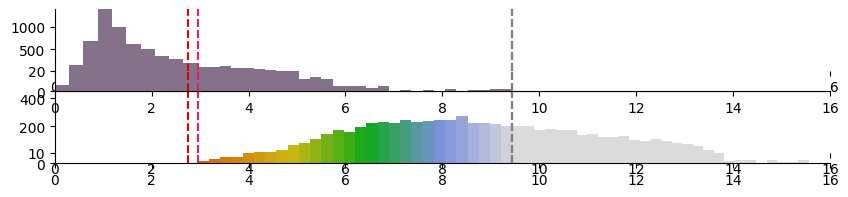

In [145]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(10, 2))  

gs = gridspec.GridSpec(4, 1, height_ratios=[3, 1, 3, .5])

ax1 = fig.add_subplot(gs[2])
ax2 = fig.add_subplot(gs[3], sharex=ax1)
ax3 = fig.add_subplot(gs[0])
ax4 = fig.add_subplot(gs[1], sharex=ax1)


fig.subplots_adjust(hspace=0) 

n, bins, patches = ax1.hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)

n, bins, patches = ax2.hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)

ax3.hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')
ax4.hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

x_min = min(mahal_distances_eur)
x_max = max(mahal_distances)

all_axs = (ax1, ax2, ax3, ax4)

for ax in all_axs:
    ax.set_xlim(0,16)

ax1.set_ylim(10, 450) 
ax2.set_ylim(0, 10)
ax3.set_ylim(20, 1400)
ax4.set_ylim(0,20)


for ax in all_axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

for ax in all_axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

ax1.spines.bottom.set_visible(False)
# ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# ax1.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.spines.right.set_visible(False)


ax3.spines.bottom.set_visible(False)
ax4.spines.top.set_visible(False)
ax3.spines.top.set_visible(False)
ax4.spines.right.set_visible(False)
ax3.spines.right.set_visible(False)

ax4.xaxis.tick_bottom()



for ax in all_axs:
    ax.axvline(min(mahal_distances)-.2, color='#d40202', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='gray', linestyle='--', ymin=0, ymax=2)

plt.savefig('figures/histograms/colormap_hist_split_axes.svg', format='svg')

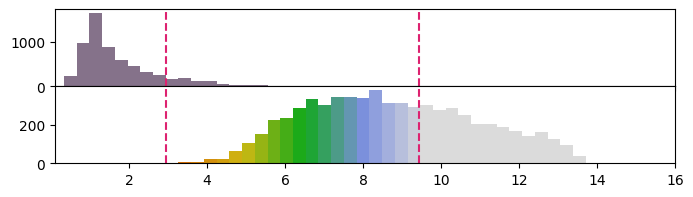

In [146]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, axs = plt.subplots(2, 1, figsize=(8, 2), sharex=True)
# plt.gca().set_facecolor('#e1e1e1')

bins = np.linspace(0,16,50)

n, bins, patches = axs[1].hist(mahal_distances, bins=bins)
cmap = cmap_custom3
norm = mcolors.Normalize(vmin=min(mahal_distances_eur), vmax=max(mahal_distances_eur))
for bin, patch in zip(bins, patches):
    color = cmap(norm(bin))
    patch.set_facecolor(color)
# axs[1].set_facecolor('#e1e1e1')
# axs[0].set_facecolor('#e1e1e1')


axs[0].hist(mahal_distances_eur, color = '#523759', bins=bins, alpha=0.7, label='europe - europe')

x_min = min(mahal_distances_eur)
x_max = max(mahal_distances)
axs[0].set_xlim(x_min, 16)
axs[1].set_xlim(x_min, 16)

for ax in axs:
    ax.axvline(min(mahal_distances), color='#dd2270', linestyle='--', ymin=0, ymax=2) 
    ax.axvline(max(mahal_distances_eur), color='#dd2270', linestyle='--', ymin=0, ymax=2)

plt.subplots_adjust(hspace=0)
# plt.savefig('figures/histograms/colormap_hist.svg', format='svg')

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

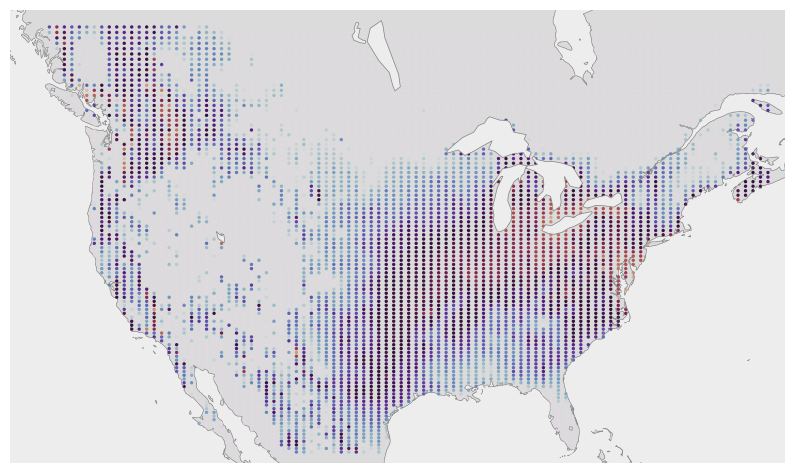

In [147]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#DBDBDB', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='twilight_r', vmin=mahal_distances.min(), vmax =mahal_distances_eur.max(), s=2)

ax.axis('off')

(-10.11298075, 46.55047775, 33.71471915, 61.16589785)

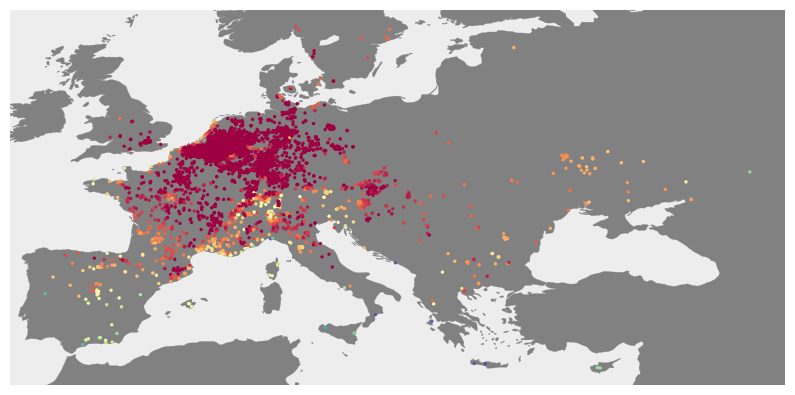

In [148]:
plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(osmia_coords['lon'], osmia_coords['lat'], transform=ccrs.PlateCarree(), 
           c=mahal_distances_eur, s=2, cmap='Spectral', vmin=2, vmax = 8)
ax.axis('off')

# plt.savefig('eur_mahal.png', format='png', dpi=300)